In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC # SVRはサポートベクトルマシンを利用した回帰に利用する

/Users/akito_harada/Documents/python/stats/ml/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
?SVC

In [3]:
?SVC.fit

In [4]:
from common import mlbench as ml

In [17]:
# トレーニングデータ
X, y = ml.twoDnormals(200, cl = 2, sd=1)

In [18]:
sv = SVC(kernel='linear')

In [19]:
sv.fit(X, y)

SVC(kernel='linear')

In [20]:
np.mean(sv.predict(X)!=y)

0.085

In [21]:
# テストデータ
tX, ty = ml.twoDnormals(1000, cl = 2, sd = 1)
py = sv.predict(tX)
np.mean(ty!=py)

0.1

In [22]:
1 - sv.score(tX, ty) # スコアで精度を計算

0.09999999999999998

In [23]:
# ソフトマージンサポートベクトルマシン(カーネル法)
X, y = ml.spirals(300, cycles=1, sd = 0.15) # トレーニングデータ
tX, ty = ml.spirals(1000, cycles=1, sd = 0.15) # テストデータ

In [24]:
# 2次多項式カーネル
sv2 = SVC(kernel='poly', degree=2, gamma=1, coef0=1)
sv2.fit(X, y)
1 - sv2.score(tX, ty)

0.43899999999999995

In [25]:
# 3次多項式カーネル
sv3 = SVC(kernel='poly', degree=3, gamma=1, coef0=1)
sv3.fit(X, y)
1 - sv3.score(tX, ty)

0.244

In [27]:
?SVC

In [28]:
from sklearn.model_selection import cross_validate


In [29]:
# トレーニングデータ(2D混合正規)
X, y = ml.twoDnormals(300, cl =2, sd = 1)

In [30]:
# K重交差検証法(K = 5): gamma = 0.1, C = 1のときの検証誤差を計算
sv = SVC(kernel='rbf', gamma= 0.1, C = 1) # SVM(ガウスカーネル)
cv = cross_validate(sv, X, y, scoring='accuracy', cv = 5)
cv['test_score'] # テスト誤差の推定結果を表示

array([0.91666667, 0.95      , 0.86666667, 0.88333333, 0.83333333])

In [31]:
np.mean(cv['test_score']) # 交差検証法による制度の推定

0.89

In [32]:
1 - np.mean(cv['test_score']) #検証誤差

0.10999999999999999

In [33]:
from scipy.spatial import distance

In [40]:
# トレーニングデータ
X, y = ml.spirals(200, cycles=1.2, sd = 0.16)
X.shape

(200, 2)

In [41]:
# 距離行列の計算
dm = distance.pdist(X)
dm.shape

(19900,)

In [42]:
# 距離の分位点からgammaの候補値を設定
cg = 1/np.percentile(dm, np.arange(1, 100, 2)) ** 2
cg

array([62.45937485, 21.80869611, 13.11351286,  9.32426812,  7.30491803,
        5.84466563,  4.82368569,  4.10324567,  3.58317635,  3.20673633,
        2.88363326,  2.60396141,  2.36076063,  2.1615325 ,  1.98226999,
        1.82489544,  1.6939219 ,  1.57437788,  1.4767004 ,  1.38405195,
        1.30437292,  1.2269715 ,  1.15234326,  1.08086139,  1.01704972,
        0.96510953,  0.91450063,  0.86615484,  0.82285022,  0.78194322,
        0.74097546,  0.70386959,  0.67144499,  0.63748433,  0.60553086,
        0.57618447,  0.55108599,  0.52422649,  0.49851683,  0.47532145,
        0.45187448,  0.42943165,  0.40411026,  0.37975338,  0.35758545,
        0.33577553,  0.31074692,  0.28499511,  0.25379741,  0.21507332])

In [43]:
ncv = 5 # K = 5でK重交差検証法を実行
cvg = np.array([])
for g in cg: # gamma毎に検証誤差を計算
    sv = SVC(kernel='rbf', gamma=g, C = 1)
    cv = cross_validate(sv, X, y, scoring='accuracy', cv = ncv)
    cvg = np.r_[cvg, np.mean(cv['test_score'])]
    

In [44]:
cverr = 1 - cvg #検証誤差

In [45]:
opt_gamma = cg[np.argmin(cverr)] #最適なgamma
opt_gamma

9.324268117469567

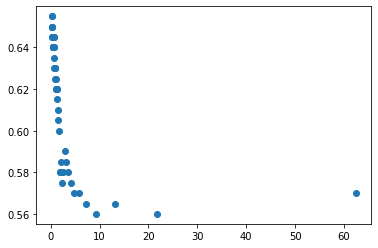

In [46]:
plt.scatter(cg, cverr)

In [52]:
# 多値判別
# 一対一法(one-vs-one)
G = 8 # 8クラスの多値判別
X, y = ml.twoDnormals(500, cl = G, sd = 0.8) # トレーニングデータ
tX, ty = ml.twoDnormals(1000, cl = G, sd = 0.8) # テストデータ

In [53]:
# 一対一法のサポートベクトルマシンで多値判別
# 線形カーネル
svlin = SVC(kernel='linear', decision_function_shape='ovo')
svlin.fit(X, y) # フィッティング
1 - svlin.score(tX, ty) # テスト誤差

0.19399999999999995

In [55]:
# ガウスカーネル
svrbf = SVC(kernel='rbf', decision_function_shape='ovo')
svrbf.fit(X, y) # フィッティング
1 - svlin.score(tX, ty) # テスト誤差

0.19399999999999995

In [56]:
# 手書き文字認識
from scipy.spatial import distance # distanceを使う

In [57]:
# データを読み込む
tr = pd.read_csv('data/optdigits_train.csv').values
te = pd.read_csv('data/optdigits_test.csv').values

In [58]:
print(tr.shape, te.shape)

(3822, 65) (1796, 65)


In [59]:
X, y = tr[:, :64], tr[:, 64]
tX, ty = te[:, :64], te[:, 64]

In [61]:
# 線形カーネルで学習
svlin = SVC(kernel='linear', decision_function_shape='ovo')
svlin.fit(X, y)
# トレーニング誤差
1 - svlin.score(X, y)

0.0

In [63]:
# テスト誤差
1 - svlin.score(tX, ty)

0.03897550111358572

In [64]:
# ガウスカーネルによる学習
# 1部のデータを使ってヒューリスティックでgammaを設定
pX = X[np.random.choice(X.shape[0], round(X.shape[0]/10)), :]

In [65]:
# 距離行列からgammaの値を設定
# 類似度の平均を取ってるイメージ
g = 1/np.median(distance.pdist(pX)) ** 2
g

0.0004152823920265781

In [66]:
svrbf = SVC(kernel='rbf', gamma=g, decision_function_shape='ovo')
svrbf.fit(X, y)
1 - svrbf.score(X, y) # トレーニング誤差

0.006802721088435382

In [68]:
1 - svrbf.score(tX, ty) # テスト誤差

0.024498886414253906

In [69]:
# カーネル幅(類似度の幅)を変えるとテスト誤差が大きく変化する
g  = 0.01
svrbf = SVC(kernel='rbf', decision_function_shape='ovo', gamma=g)
svrbf.fit(X, y)
1 - svrbf.score(X, y)

0.0

In [70]:
1 - svrbf.score(tX, ty) # テスト誤差

0.2611358574610245